In [1]:
# This notebook analyzes input-output relationships for X, Y, Z axes at different voltage levels.

In [50]:
%pip install -q matplotlib pandas numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Now read the data. It goes: timestep, x-axis in, y-axis in, z-axis in, x-axis out, y-axis out, z-axis out

In [82]:
df = pd.read_csv("/dls/science/users/qfc83269/deltabot_data/2V_all_axis_2.txt", sep=r"\s+", header=None)

df.columns = [
    "timestep",
    "x_in_reg", "x_in",
    "y_in_reg", "y_in",
    "z_in_reg", "z_in",
    "x_out", "y_out", "z_out"
]
file_format = df.columns

# Z axis was dominating the scale with an offset, so scale values along each axis.
in_scaler = StandardScaler()
out_scaler = StandardScaler()

df[["x_in", "y_in", "z_in"]] = in_scaler.fit_transform(df[["x_in", "y_in", "z_in"]])
df[["x_out", "y_out", "z_out"]] = out_scaler.fit_transform(df[["x_out", "y_out", "z_out"]])

print(df.head(100))
print("Shape:", df.shape)

      timestep    x_in_reg      x_in   y_in_reg      y_in    z_in_reg  \
0   1730800258    0.000000  0.068688   0.000000  0.063466    0.000000   
1   1730800259 -109.245051 -0.980455  65.538624  0.696311  -56.594499   
2   1730800260 -110.267994 -0.990279  65.020772  0.691311  -57.262505   
3   1730800261 -111.290321 -1.000097  64.503002  0.686311  -57.927445   
4   1730800262 -112.311980 -1.009909  63.985308  0.681312  -58.589317   
..         ...         ...       ...        ...       ...         ...   
95  1730800353 -196.245186 -1.815968  16.209134  0.219982 -106.057261   
96  1730800354 -197.008194 -1.823296  15.667926  0.214757 -106.442903   
97  1730800355 -197.766652 -1.830580  15.126245  0.209526 -106.825733   
98  1730800356 -198.520532 -1.837820  14.584090  0.204291 -107.205756   
99  1730800357 -199.269809 -1.845015  14.041463  0.199051 -107.582979   

        z_in     x_out     y_out     z_out  
0   0.058715  0.071019  0.136959  0.080629  
1  -0.486247  0.071106  0.136522 

Analyse the relationship between the raw inputs and outputs ...

In [83]:
def plot_raw_inputs():
    # raw inputs vs outputs
    fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

    axs[0].plot(df["timestep"], df["x_in"], label="x_in (V)")
    axs[0].plot(df["timestep"], df["x_out"], label="x_out (nm)")
    axs[0].legend(); axs[0].set_ylabel("X-axis")

    axs[1].plot(df["timestep"], df["y_in"], label="y_in (V)")
    axs[1].plot(df["timestep"], df["y_out"], label="y_out (nm)")
    axs[1].legend(); axs[1].set_ylabel("Y-axis")

    axs[2].plot(df["timestep"], df["z_in"], label="z_in (V)")
    axs[2].plot(df["timestep"], df["z_out"], label="z_out (nm)")
    axs[2].legend(); axs[2].set_ylabel("Z-axis")
    axs[2].set_xlabel("Timestep")

    plt.tight_layout()
    plt.show()


def scatter_plot():
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    axs[0].scatter(df["x_in"], df["x_out"], s=1, alpha=0.5)
    axs[0].set_xlabel("x_in (V)")
    axs[0].set_ylabel("x_out (nm)")
    axs[0].set_title("X-axis response")

    axs[1].scatter(df["y_in"], df["y_out"], s=1, alpha=0.5, c="orange")
    axs[1].set_xlabel("y_in (V)")
    axs[1].set_ylabel("y_out (nm)")
    axs[1].set_title("Y-axis response")

    axs[2].scatter(df["z_in"], df["z_out"], s=1, alpha=0.5, c="green")
    axs[2].set_xlabel("z_in (V)")
    axs[2].set_ylabel("z_out (nm)")
    axs[2].set_title("Z-axis response")

    plt.tight_layout()
    plt.show()

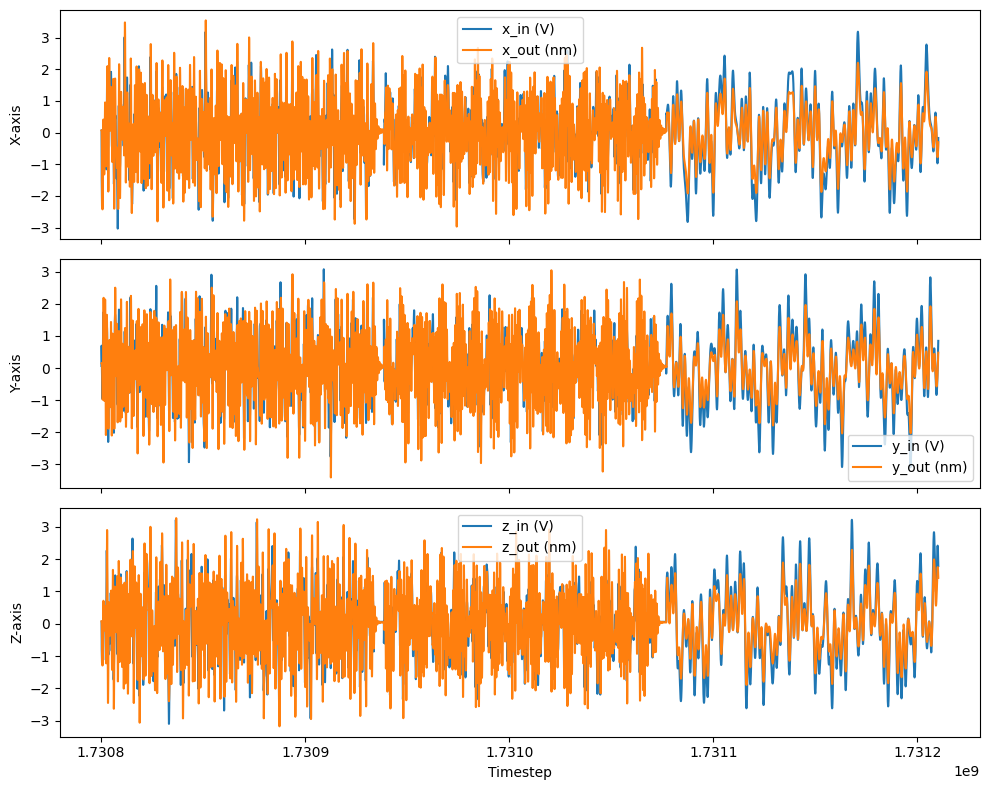

In [84]:
plot_raw_inputs()

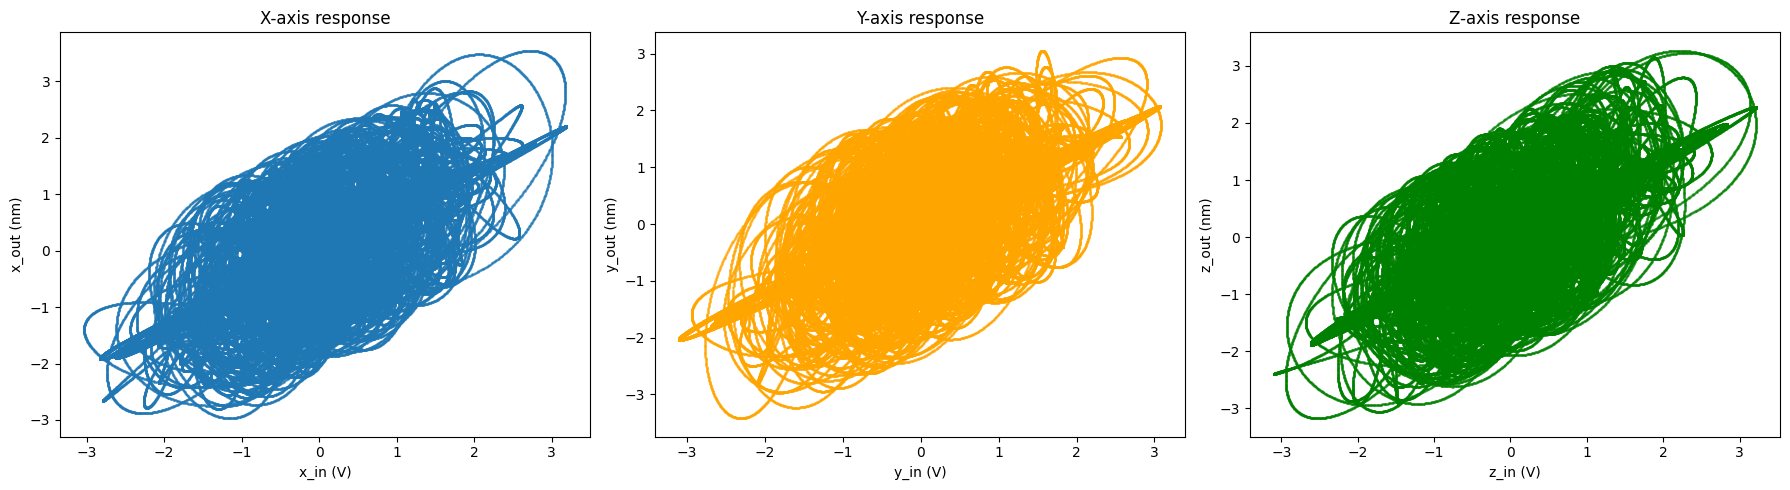

In [85]:
scatter_plot()

In [86]:
# Now do the comparison against different voltages (1, 2.5, 3, 4)

In [87]:
# load all the files
def load_file(path, label):
    df = pd.read_csv(path, sep=r"\s+", header=None)
    df.columns = file_format
    df["voltage_level"] = label # add this as an extra metadata
    df[["x_in", "y_in", "z_in"]] = StandardScaler().fit_transform(df[["x_in", "y_in", "z_in"]])
    df[["x_out", "y_out", "z_out"]] = StandardScaler().fit_transform(df[["x_out", "y_out", "z_out"]])
    return df

df_4V = load_file("/dls/science/users/qfc83269/deltabot_data/4V_all_axis_1.txt", 4)
df_2p5V = load_file("/dls/science/users/qfc83269/deltabot_data/2'5V_all_axis_1.txt", 2.5)
df_1V = load_file("/dls/science/users/qfc83269/deltabot_data/1V_all_axis_2.txt", 1)
df_3V = load_file("/dls/science/users/qfc83269/deltabot_data/3V_all_axis_1.txt", 3)

df_all = pd.concat([df_4V, df_2p5V, df_1V, df_3V], ignore_index=True)
df_all.head(100)
df_all.head(-10)

,timestep,x_in_reg,x_in,y_in_reg,y_in,z_in_reg,z_in,x_out,y_out,z_out,voltage_level
0,1685513105,0.000000,-0.060805,0.000000,-0.079770,0.000000,-0.075244,-0.033548,-0.008188,-0.040958,4.0
1,1685513106,156.714771,0.697554,-45.059331,-0.296151,104.075009,0.412793,-0.033481,-0.008484,-0.040944,4.0
2,1685513107,157.220010,0.699999,-45.136765,-0.296523,104.031617,0.412589,-0.033411,-0.008801,-0.040930,4.0
3,1685513108,157.726427,0.702450,-45.212515,-0.296887,103.991350,0.412401,-0.033327,-0.009116,-0.040919,4.0
4,1685513109,158.234016,0.704906,-45.286576,-0.297242,103.954200,0.412226,-0.033247,-0.009428,-0.040907,4.0
...,...,...,...,...,...,...,...,...,...,...,...
1639985,1679133286,223.295585,1.410150,-24.681264,-0.185446,171.544184,1.152173,1.723784,0.700439,0.926097,3.0
1639986,1679133287,222.799648,1.406934,-24.919487,-0.186987,171.720635,1.153405,1.717878,0.699585,0.934605,3.0
1639987,1679133288,222.304751,1.403724,-25.159451,-0.188540,171.893171,1.154609,1.711933,0.698675,0.943086,3.0
1639988,1679133289,221.810919,1.400522,-25.401128,-0.190103,172.061798,1.155786,1.705958,0.697726,0.951504,3.0


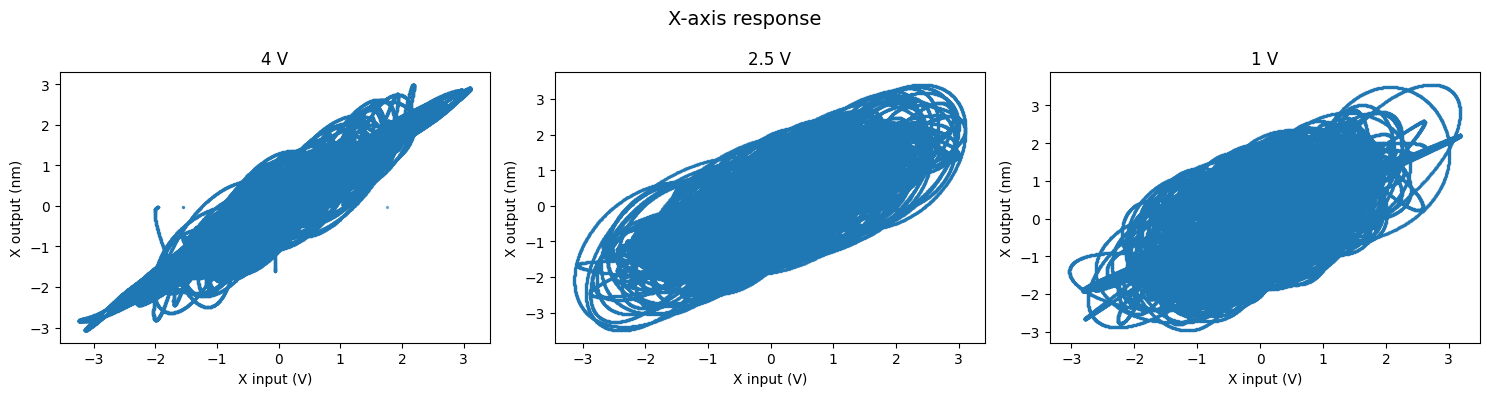

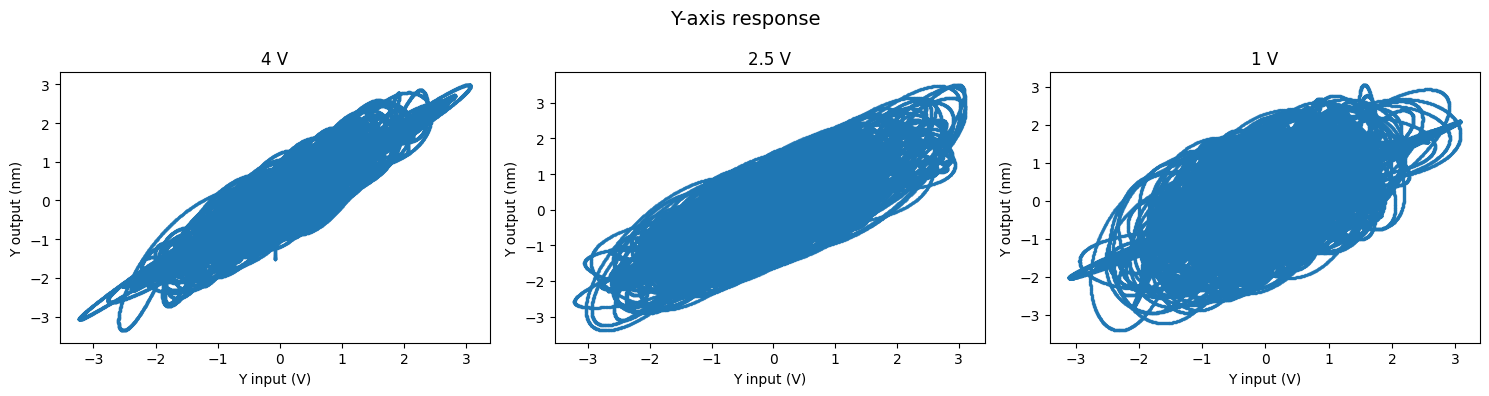

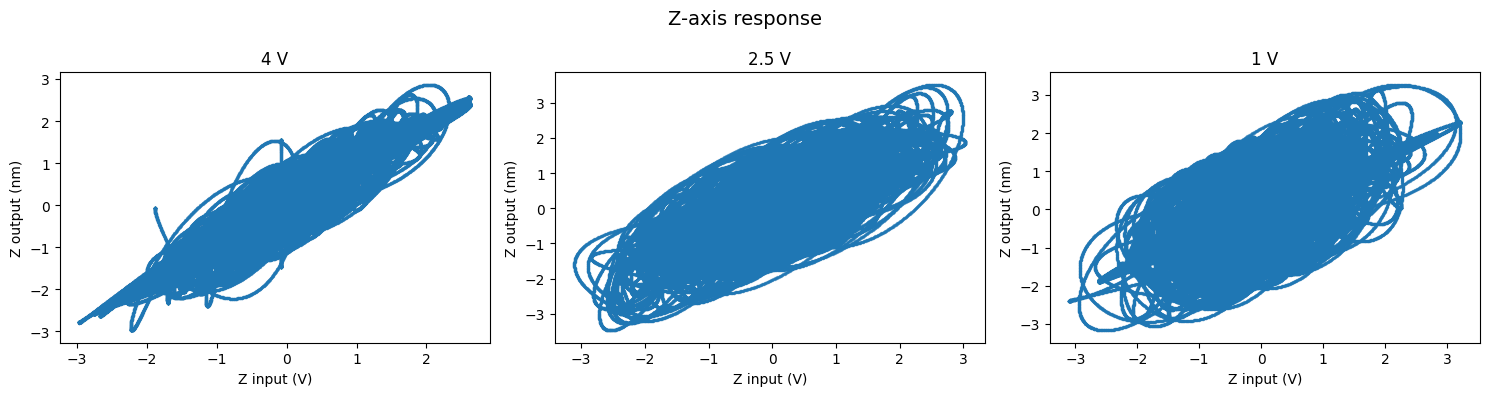

In [88]:
axes = ["x", "y", "z"]

for axis in axes:
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    for ax, v in zip(axs, [4, 2.5, 1]):
        subset = df_all[df_all["voltage_level"] == v]
        ax.scatter(subset[f"{axis}_in"], subset[f"{axis}_out"], s=2, alpha=0.5)
        ax.set_title(f"{v} V")
        ax.set_xlabel(f"{axis.upper()} input (V)")
        ax.set_ylabel(f"{axis.upper()} output (nm)")
    fig.suptitle(f"{axis.upper()}-axis response", fontsize=14)
    plt.tight_layout()
    plt.show()